<a href="https://colab.research.google.com/github/AnandKhandekar/GMM-with-EM-algortihm/blob/master/Clustering_GMM_with_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guassian Mixture Models for Clustering multi variate Unsupervised data using EM algorit
Includes the  log likelihiid function and plotting it.


In [0]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
uploaded=files.upload()

Saving X.csv to X.csv


In [0]:
data=pd.read_csv("/content/X.csv",header=None)

In [5]:
data.head()

,0,1
0,-0.756911,-2.234633
1,-0.038032,1.852539
2,0.158601,1.371332
3,0.961673,-0.504338
4,-0.187963,0.955550


In [7]:
data.shape

(300, 2)

In [0]:
data=np.asarray(data)

In [9]:
data.shape

(300, 2)

In [12]:
classes =5
length=data.shape[0]
dim= data.shape[1]
iterationMax=10
Sigma_k =np.eye(dim)    # this is a 2D array with diagonal elements as 1 and non dagonal elements are 0
    #print(Sigma_k)
Sigma= np.repeat(Sigma_k[:,:,np.newaxis],classes,axis=2)  # creates 5 copies in stacks like RGB of Sigma_k
    #print(Sigma[:,:,0])
    #Sigma.shape
piClass=np.ones(classes)*(1/classes)  # piClass = [0.2 0.2 0.2 0.2 0.2]  we assign uniform probability to each class as intial probabilities
phi=np.zeros((length,classes))  # phi.shape = (300,5) of all zeros it is a 2D array
phiNorm=np.zeros((length,classes))  # phiNorm.shape = (300,5)  of all zeros is a 2D

    #initialize the mu with uniform random selection of data points
indices = np.random.randint(0,length,size=classes)  # create random integers between 0 and 300, create 5 such numbers
    #print(indices) gives the following output [ 40 156 98 47 168]
mu = data[indices]   # initialize means mu randomly. It has a shape of (5,2)
    # [ [ 0.01495409 -0.57444854]
    #   [ 0.80116939  9.62375458]
    #   [11.35550179  6.01803989]
    #   [-0.88275349  0.91389693]
    #   [ 1.80618089  9.37855187] ]
log_plot=[]

for iteration in range(iterationMax):
        # compute the E-step 
    for k in range(classes):
        invSigma_k=np.linalg.inv(Sigma[:,:,k])   # invSigma is also a 2 X 2 Identity matrix [[1. 0.][1. 0.]] of shape (2,2)
        invSqrDetSigma_k=(np.linalg.det(Sigma[:,:,k]))**-0.5   #  since Sigma is a unit matrix therefore the determinant of the Sqr root of Sigma =1
        for index in range(length):
            xi=data[index,:]  # extract a single data point row wise from the dataset
            temp1 = (((xi-mu[k]).T).dot(invSigma_k)).dot(xi-mu[k])
            phi[index, k] = piClass[k]*((2*np.pi)**(-dim/2))*invSqrDetSigma_k*np.exp(-0.5*temp1) # calculate the numerator. for each data point for each cluster
        for index in range(length):
            tot = phi[index,:].sum()
            phiNorm[index,:]=phi[index,:]/float(tot) # these are all the responsibilities for all point for all clusters
             
        
    L=np.sum(phi,axis=1)
    L.reshape((length,1))



    log_likelihood_data=0
    for i in range(L.shape[0]):
        log_likelihood_data=log_likelihood_data+np.log(L[i])
    
    

    print(log_likelihood_data)   
    log_plot=np.append(log_plot,log_likelihood_data)   
    #print(phi.shape)   # (300,5)
   # print(tot.shape)    # ()
    #print(phiNorm.shape)  # (300,5)
    #print(L.shape)        # (300,)
    #print(log_likelihood_data.shape)  # (300,)
    



    # compute the M-step
    nK =  np.sum(phiNorm,axis=0)
    piClass = nK / float(length)
    for k in range(classes):
       mu[k] = ((phiNorm[:,k].T).dot(data))/nK[k]
    for k in range(classes):
        temp1 = np.zeros((dim,1))
        temp2 = np.zeros((dim,dim))
        for index in range(length):
            xi = data[index,:]
            temp1[:,0] = xi - mu[k]
            temp2 = temp2 + phiNorm[index,k]*np.outer(temp1,temp1)
        Sigma[ : , : , k ] = temp2 / float(nK[k])






data_prob=phi.argmax(axis=1)
data_prob=np.asarray(data_prob)
print(data_prob)
print(data_prob.shape)
print(phiNorm.size)



-2792.201063834958
-1413.806842696827
-1408.7704018906163
-1407.1377382825287
-1406.320779098496
-1405.8479229322986
-1405.5367294462717
-1405.301947550945
-1405.1020587591145
-1404.916480590248
[0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 3 2 3 4 3 4 2 2 4 4 2
 4 2 3 4 4 4 3 4 2 4 4 2 2 2 4 3 4 2 4 2 2 4 3 2 4 4 2 3 4 4 2 2 2 2 2 3 2
 2 2 2 3 3 2 3 2 2 4 4 2 2 2 2 4 4 4 2 2 3 3 4 3 2 3 4 2 2 4 4 2 3 3 2 3 2
 4 2 3 2 2 2 2 2 2 2 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
(300,)
1500


In [13]:
data_prob=data_prob.reshape(length,1)
data_prob.shape

(300, 1)

In [14]:
data_new=np.concatenate((data,data_prob),axis=1)
print(data_new.shape)
#for i in range(10):
print(data_new[0:10,:])

(300, 3)
[[-0.75691129 -2.23463333  0.        ]
 [-0.03803155  1.85253941  1.        ]
 [ 0.15860061  1.37133226  1.        ]
 [ 0.9616725  -0.50433753  1.        ]
 [-0.18796253  0.95555025  1.        ]
 [-0.54810825  0.96429775  0.        ]
 [ 0.51812679 -0.20808436  1.        ]
 [-0.68574984 -1.83062039  0.        ]
 [-0.17568334  0.18621907  0.        ]
 [-0.71519923 -1.7549757   0.        ]]


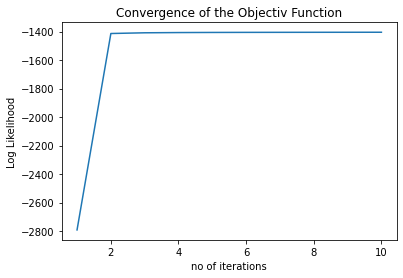

In [18]:
iteration =[1,2,3,4,5,6,7,8,9,10]
plt.plot(iteration,log_plot)
plt.xlabel('no of iterations')
plt.ylabel('Log Likelihood')
plt.title('Convergence of the Objectiv Function')
plt.show()